In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import time
import operator


# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

### MovieLens 데이터 살펴보기

In [2]:
rating_data = pd.io.parsers.read_csv('data10/ml-1m/ratings.dat',
                        names=['user_id', 'movie_id', 'rating', 'time'],
                        delimiter='::')

rating_data


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movie_data = pd.io.parsers.read_csv('data10/ml-1m/movies.dat',
                            names=['movie_id', 'title', 'genre'],
                            delimiter='::')
movie_data

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
user_data = pd.io.parsers.read_csv('data10/ml-1m/users.dat',
                names=['user_id', 'gender', 'age', 'occupation', 'zipcode'],
                delimiter='::')
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [6]:
movie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [8]:
rating_data.isna().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

In [9]:
movie_data.isna().sum()


movie_id    0
title       0
genre       0
dtype: int64

In [10]:
user_data.isna().sum()


user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

## 데이터 분석

### 분석할 영화의 정보 탐색하기

In [11]:
# 전체 영화 데이터 로우의 개수
print(f'전제 영화 데이터 로우의 개수 : {len(movie_data)}')
# movie_id가 중복된 것을 제거한 개수
print(f'중복 제외한 영화의 개수 : {len(movie_data["movie_id"].unique())}')

전제 영화 데이터 로우의 개수 : 3883
중복 제외한 영화의 개수 : 3883


In [12]:
# 년도별 영화 수를 가져온다.
movie_data['year'] = movie_data['title'].apply(lambda x : x[-5:-1] )
movie_data['year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [13]:
# 각 영화의 연대별 갯수를 가져오세요.
# 연대별 년도값을 담을 컬럼의 이름은 year_term
# 1910, 1920, 1930....

In [14]:
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2] + '0' )
movie_year_term= movie_data['year_term'].value_counts().sort_index()
print(movie_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


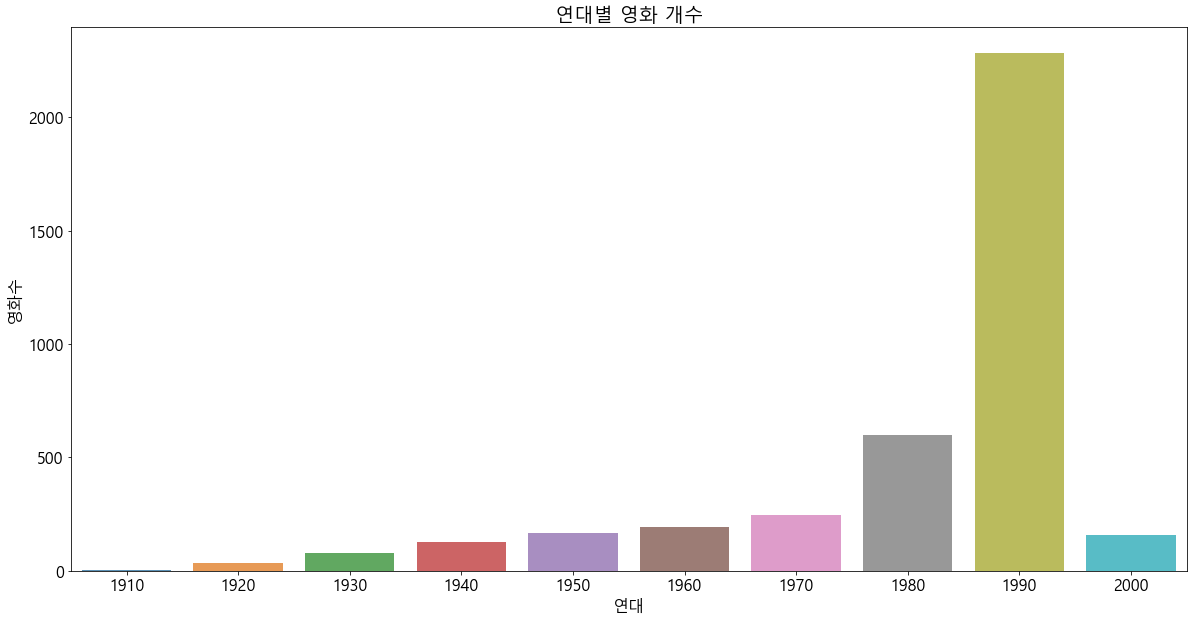

In [15]:
sns.barplot(movie_year_term.index, movie_year_term.values, alpha=0.8)
plt.title('연대별 영화 개수')
plt.xlabel('연대')
plt.ylabel('영화수')
plt.show()

## 장르별 속성 탐색

In [16]:
# 가장 많이 사용된 장르의 조합을 출력한다.
movie_data['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Adventure|Romance|Sci-Fi|War      1
Action|Drama|Western                     1
Sci-Fi|War                               1
Adventure|Drama|Western                  1
Comedy|Romance|Sci-Fi                    1
Name: genre, Length: 301, dtype: int64

In [17]:
# 가장 많이 등장한 장르의 속성을 추출한다.
# 장르들을 담을 딕셔너리
unique_genre_dict = {}

# 영화의 수 만큼 반복하면서 장르를 추출한다.
for row in movie_data['genre'] :
    # print(row)
    # | 를 기준으로 문자열을 잘라준다.
    parsed_genre = row.split('|')
    # print(parsed_genre)
    for genre_name in parsed_genre :
        # print(genre_name)
        # 해당 장르로 저장된 것이 없다면..
        if unique_genre_dict.get(genre_name) == None :
            unique_genre_dict[genre_name] = 1
        # 해당 장르로 저장된 것이 있다면..
        else :
            unique_genre_dict[genre_name] = unique_genre_dict[genre_name] + 1

print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


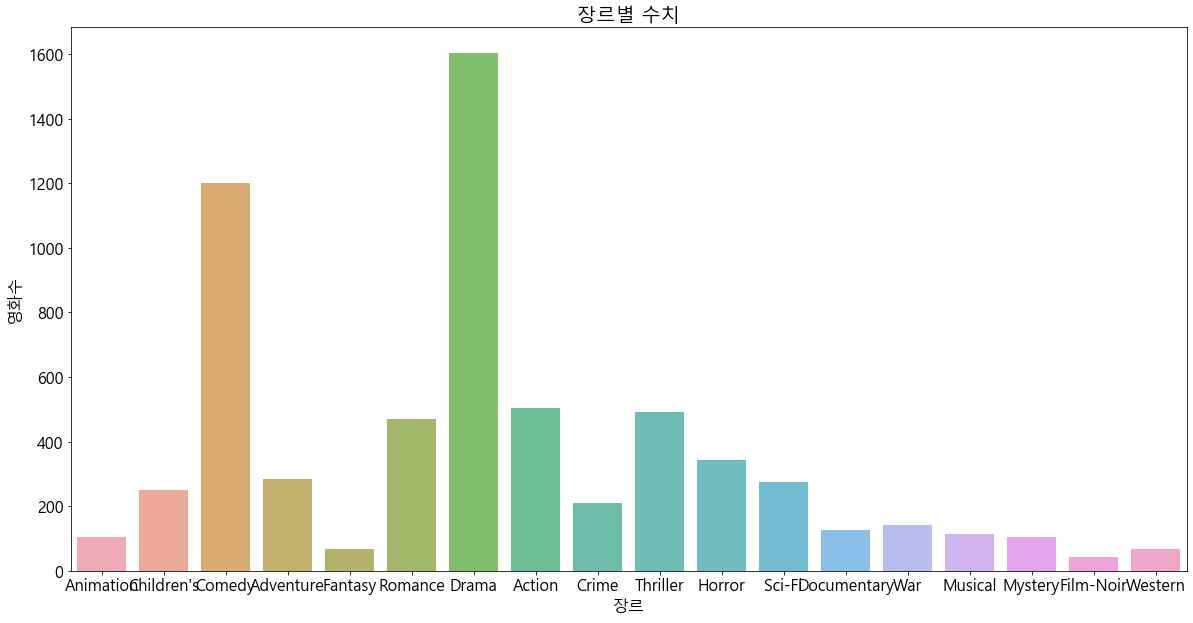

In [18]:
# 장르의 속성을 그래프로 그린다.
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('장르별 수치')
plt.ylabel('영화수')
plt.xlabel('장르')
plt.show()

### 전체 사용자 수를 파악한다.

In [19]:
print(f'사용자 전체 로우의 수 : {len(user_data)}')
print(f'중복 제외한 사용자의 수 : {len(user_data["user_id"].unique())}')

사용자 전체 로우의 수 : 6040
중복 제외한 사용자의 수 : 6040


### 사용자의 성별 별 수를 그래프로 시각화한다.

In [20]:
user_count = user_data['gender'].value_counts()
user_count 

M    4331
F    1709
Name: gender, dtype: int64

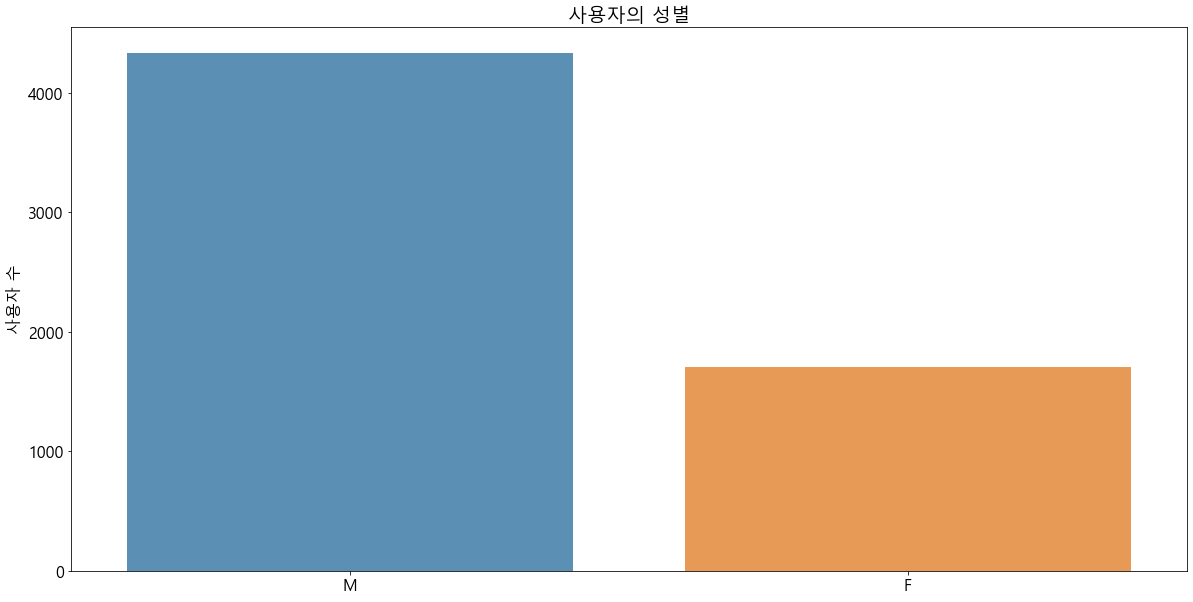

In [21]:
sns.barplot(user_count.index , user_count.values, alpha = 0.8)
plt.title('사용자의 성별')
plt.ylabel('사용자 수')
plt.show()

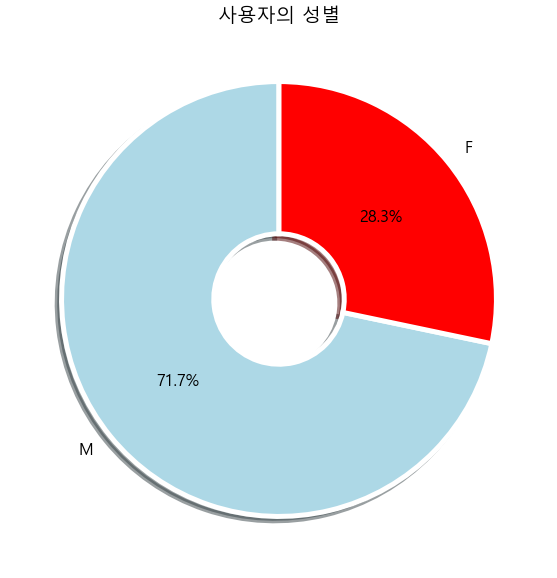

In [22]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(user_count, labels=user_count.index, shadow=True,  autopct='%.1f%%',startangle=90, colors=['lightblue','red'],
       wedgeprops=wedgeprops)
plt.title('사용자의 성별')
plt.show()

In [23]:
# 성별 별 사용자 수를 가져온다.
user_gender = user_data['gender'].value_counts()
user_gender

M    4331
F    1709
Name: gender, dtype: int64

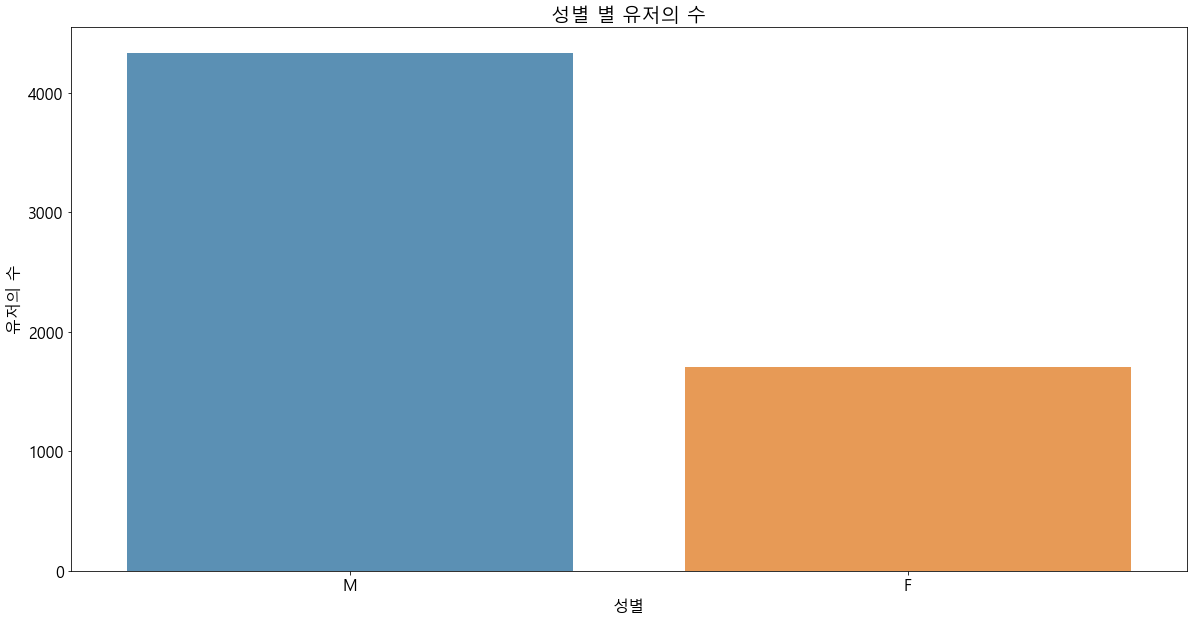

In [24]:
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('성별 별 유저의 수')
plt.xlabel('성별')
plt.ylabel('유저의 수')
plt.show()


### 연령대별(10대,20대,30대) 사용자 수를 그래프로 시각화한다.
- 9세 이하는 outlier로 취급한다.
- 10 ~ 19세는 10,  20~29세는 20 ...

In [25]:
#age 컬럼이 숫자인지 확인한다.
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [26]:
def age_classification(age) :
    if age< 10 :
        return 'outlier'
    else :
        return str(age // 10 * 10)
    
user_data['ages'] = user_data['age'].apply(lambda x : age_classification(x))
user_data['ages']

0       outlier
1            50
2            20
3            40
4            20
         ...   
6035         20
6036         40
6037         50
6038         40
6039         20
Name: ages, Length: 6040, dtype: object

In [27]:
# 연령대별 유저 수를 구한다
user_sort = user_data['ages'].value_counts().sort_index()
user_sort

10         1103
20         2096
30         1193
40          550
50          876
outlier     222
Name: ages, dtype: int64

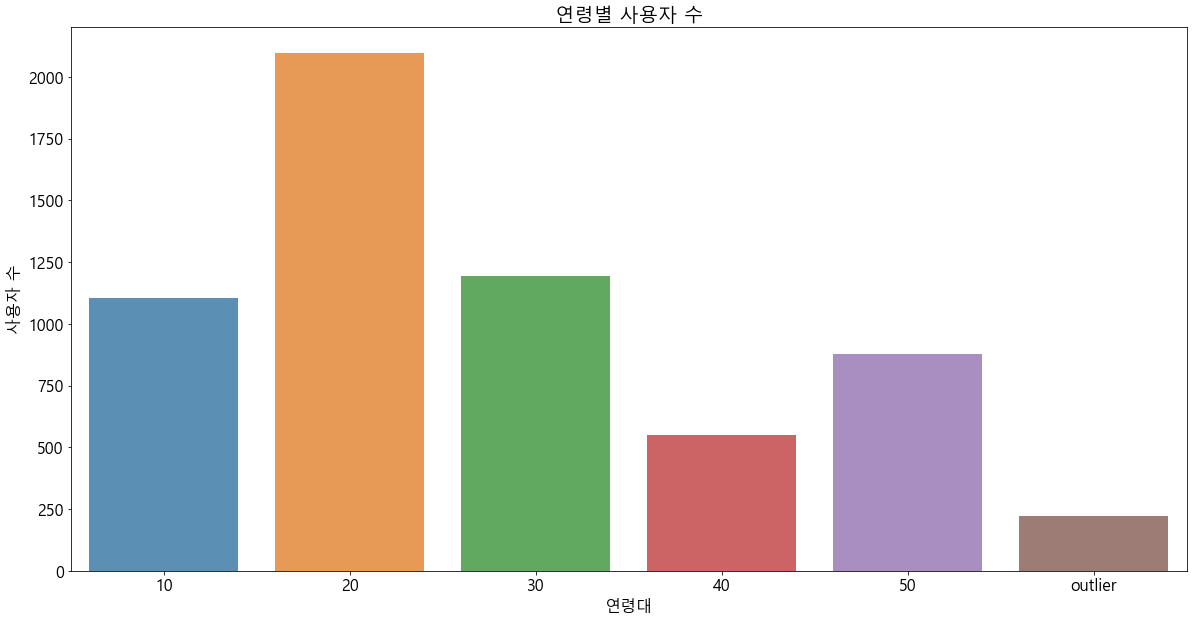

In [28]:
sns.barplot(user_sort.index, user_sort.values, alpha=0.8)
plt.title('연령별 사용자 수')
plt.ylabel('사용자 수')
plt.xlabel('연령대')
plt.show()

## 각 영화들이 평가받은 횟수를 탐색한다.

In [29]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [30]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
movie_rate_count

array([2077,  701,  478, ...,   54,   40,  388], dtype=int64)

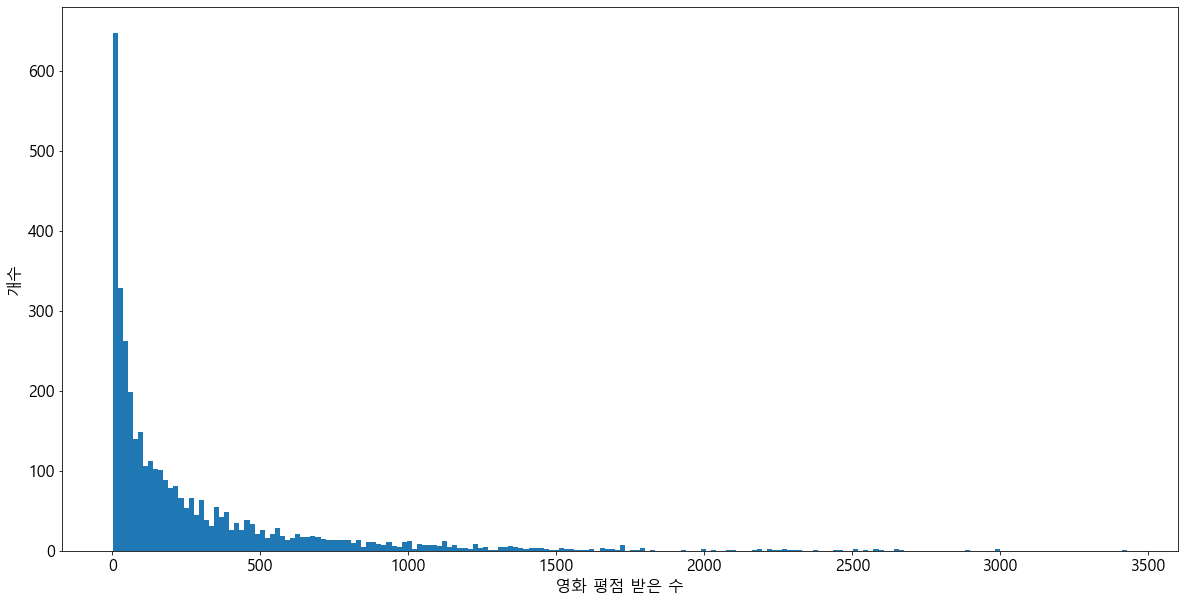

In [31]:
plt.hist(movie_rate_count, bins=200)
plt.ylabel('개수')
plt.xlabel('영화 평점 받은 수')

plt.show()

In [32]:
# 전체 영화 수
print(f'전체 영화 수 : {len(movie_data)}')
# 평가를 100 미만으로 받은 영화 수
print(f'평가를 100개 미만 받은 영화 수 : {len(movie_rate_count[movie_rate_count < 100])}')

전체 영화 수 : 3883
평가를 100개 미만 받은 영화 수 : 1687


In [33]:
# 영화별 평균 평점을 가져온다.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info


,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


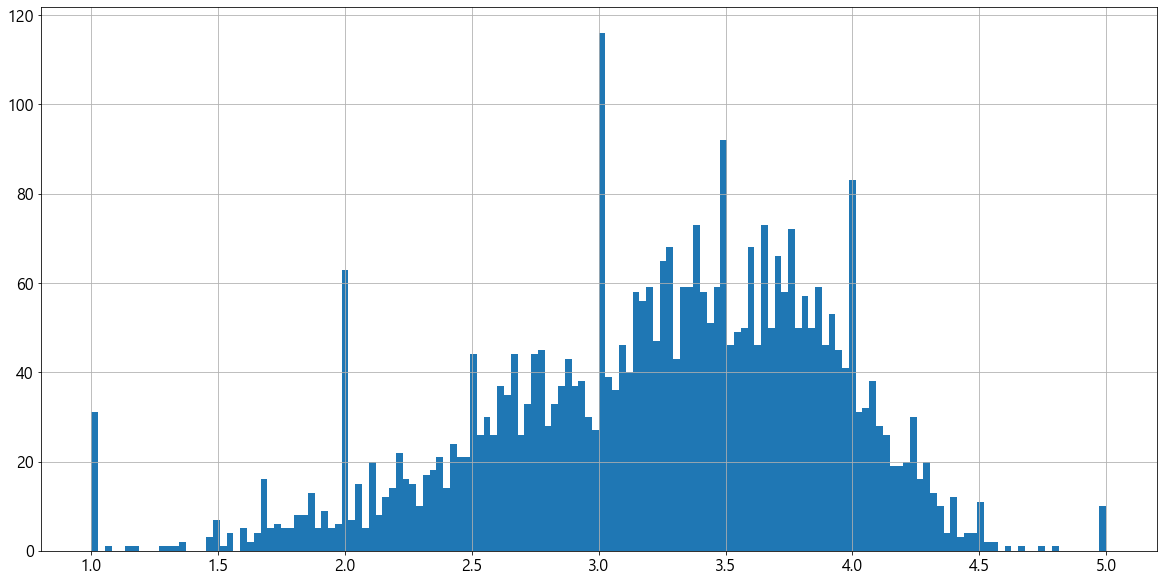

In [34]:
movie_grouped_rating_info['rating_mean'].hist(bins=150)
plt.show()


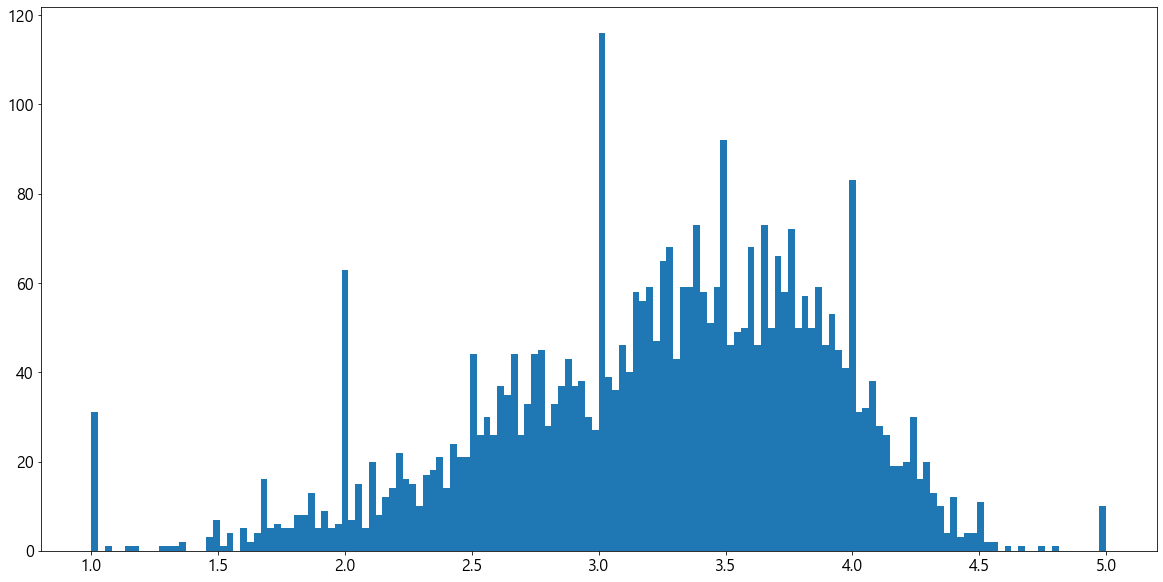

In [35]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)
plt.show()


In [36]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 가져온다.
# 평점 평균 정보와 영화 정보를 합친다.
# on : 지정된 컬럼의 값이 같은 것 끼리만 가져온다.
# how : left, right. 결측치로 셋팅할 데이터프레임 지정
a1= movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
a1


,movie_id,rated_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000
3703,3950,54,3.666667,Tigerland (2000),Drama,2000,2000
3704,3951,40,3.900000,Two Family House (2000),Drama,2000,2000


In [37]:
# 평가를 받은 횟수가 100 이상인 영화 정보를 가져온다.
a2 = a1.query('rated_count >= 100')
a2

,movie_id,rated_count,rating_mean,title,genre,year,year_term
0,1,2077,4.146846,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,701,3.201141,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,478,3.016736,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,170,2.729412,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,296,3.006757,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...,...,...
3690,3937,135,2.940741,Runaway (1984),Sci-Fi|Thriller,1984,1980
3699,3946,100,2.260000,Get Carter (2000),Action|Drama|Thriller,2000,2000
3701,3948,862,3.635731,Meet the Parents (2000),Comedy,2000,2000
3702,3949,304,4.115132,Requiem for a Dream (2000),Drama,2000,2000


In [38]:
# 평균평점과 영화 제목을 가져온다.
a3 = a2.sort_values('rating_mean', ascending=False)
a3[['rating_mean','title']].head(10)

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,"Shawshank Redemption, The (1994)"
802,4.524966,"Godfather, The (1972)"
708,4.520548,"Close Shave, A (1995)"
49,4.517106,"Usual Suspects, The (1995)"
513,4.510417,Schindler's List (1993)
1066,4.507937,"Wrong Trousers, The (1993)"
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


### 실습예제
- 위에서 한것과 동일한 방법으로
- 유저별로 평가한 영화 개수
- 유저별로 평가한 평균 영화 점수
- 유저별로 평가한 영화 점수의 편차

In [39]:
a1 = rating_data.groupby('user_id').count()
a1[['movie_id']]

,movie_id
user_id,
1,53
2,129
3,51
4,21
5,198
...,...
6036,888
6037,202
6038,20


In [40]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [41]:
a1 = rating_data.groupby('user_id').mean()[['rating']]
a1.sort_values(by='rating', ascending= False)

,rating
user_id,
283,4.962963
2339,4.956522
3324,4.904762
3902,4.890909
446,4.843137
...,...
5850,1.844828
4539,1.815126
2744,1.304348


In [42]:
# 유저별 영화 평가를 탐색한다.
# 유저별 영화 평가를 탐색한다.
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns=['rated_count', 'rated_mean', 'rated_std']
user_grouped_rating_info

,rated_count,rated_mean,rated_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699
...,...,...,...
6036,888,3.302928,1.023684
6037,202,3.717822,0.877910
6038,20,3.800000,1.105013


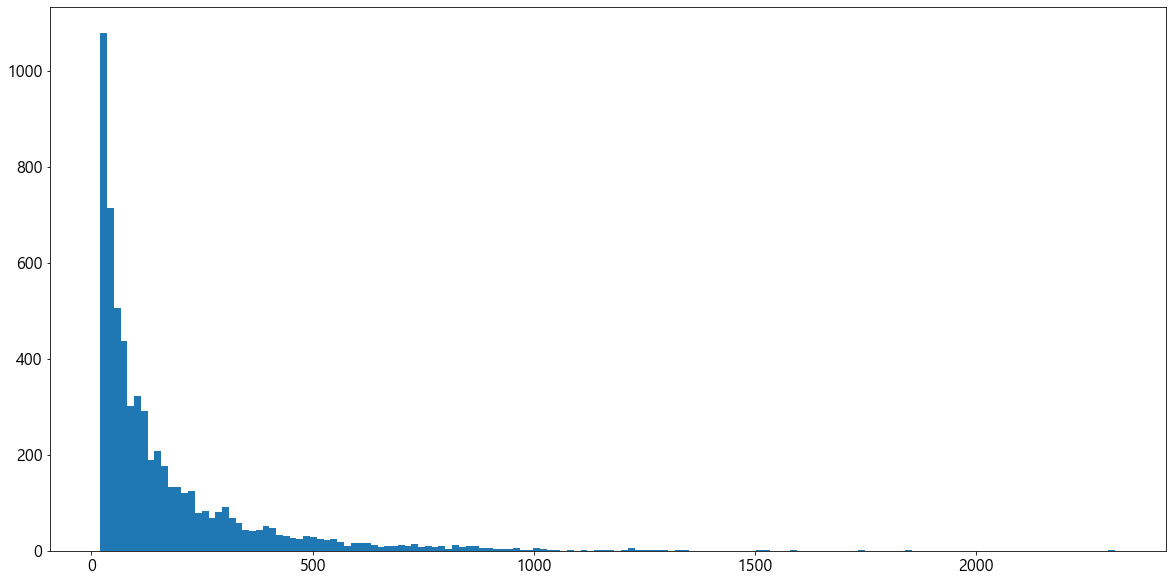

In [43]:
# 유저별로 평가한 영화 개수의 분포
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)
plt.show()

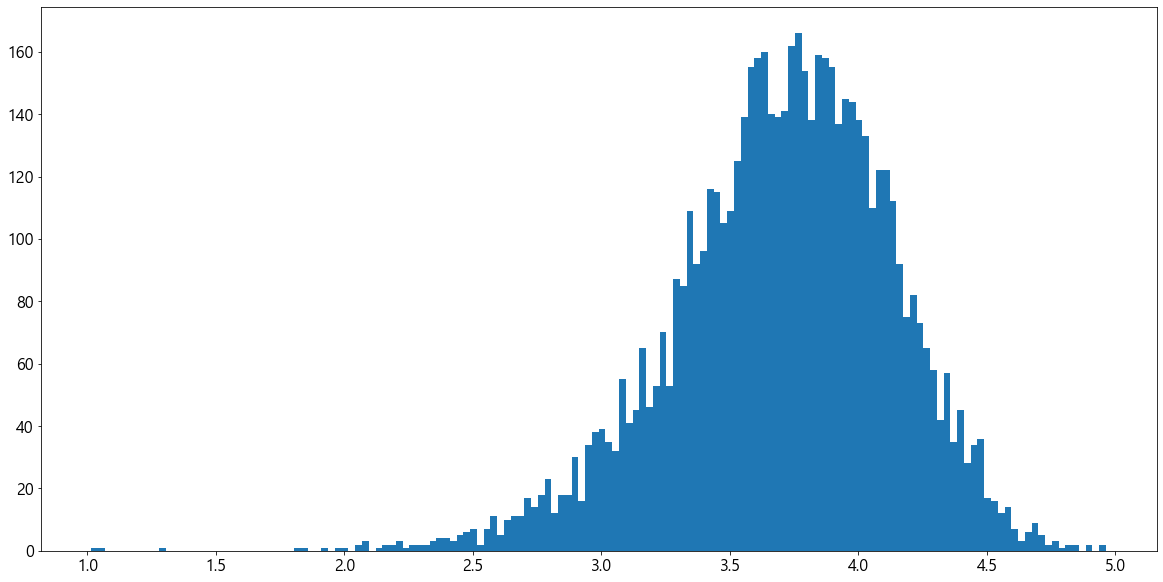

In [44]:
# 유저별로 평가한 영화 점수 평균의 분포
user_grouped_rating_info['rated_mean'].hist(bins=150, grid=False)
plt.show()

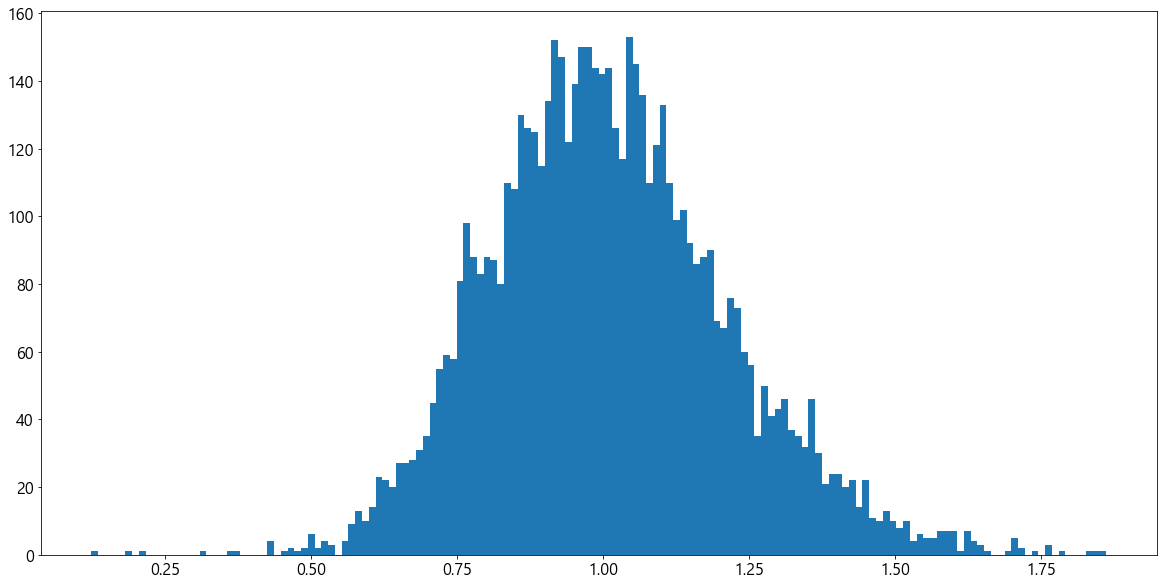

In [45]:
# 유저별로 평가한 영화 점수 편차의 분포
user_grouped_rating_info['rated_std'].hist(bins=150,grid=False)
plt.show()

#### user movie 형태의 테이블로 살펴보기

In [46]:
rating_data


,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [47]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성한다
a1 = rating_data[['user_id', 'movie_id', 'rating']]
# display(a1)
a2 = a1.set_index(['user_id', 'movie_id'])
# display(a2)
rating_table = a2.unstack()
rating_table


rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

### 수학적 기법을 활용한 평점예측
- pip install surprise

In [48]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [49]:
# 데이터 프레임을 생성한다.
ratings_dict = {
    'item_id' : [1, 2, 3, 1, 2, 3, 2],
    'user_id' : ['a', 'a', 'a', 'b', 'b', 'b', 'c'],
    'rating' : [2, 4, 4, 2, 5, 4, 5]
}
df = pd.DataFrame(ratings_dict)
df


,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [57]:
# unstack 사용
a1 = df[['user_id', 'item_id','rating']]
display(a1)
a2 = a1.set_index(['user_id','item_id'])
display(a2)
a3 = a2.unstack()
a3
# 결측치를 0으로 채워준다.
df_matrix_table= a3.fillna(0)
df_matrix_table

,user_id,item_id,rating
0,a,1,2
1,a,2,4
2,a,3,4
3,b,1,2
4,b,2,5
5,b,3,4
6,c,2,5


rating
user_id item_id        
a       1             2
        2             4
        3             4
b       1             2
        2             5
        3             4
c       2             5

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

<pre>추천 순
- 1. 가장 높은 평점의 상품들을 추천
- 2. 유사도 평가 - 구매한 상품에대해 평가를 해야함 
     성향평가
</pre>

### SVD 기반으로 빈칸 채워주기

In [58]:
# 데이터를 읽어들이기 위한 객체
reader = Reader(rating_scale=(1,5))
# 1~ 100 점을 평가하려면 1,100으로 줘야하나?

In [59]:
# 데이터 셋을 생성한다.
a1 = df[['user_id', 'item_id', 'rating']]
data = Dataset.load_from_df(df=a1, reader=reader)
data

In [60]:
# 학습용 데이터를 생성한다.
#  surprise 라이브러리가 인식할 수 있는 학습 데이터셋을 구성한다.
train_data = data.build_full_trainset()
train_data

In [61]:
# SVD 모델로 학습한다.
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=10)
model.fit(train_data)

In [63]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측한다.
# build_anti_testset() : 학습에 사용된 데이터에서 0으로 평가되어 있는 부분의 데이터
# user 혹은 item은 학습에 반드시 등장한 적이 있어야한다는 전제조건
test_data = train_data.build_anti_testset()
test_data

[('c', 1, 3.7142857142857144), ('c', 3, 3.7142857142857144)]

In [65]:
# 예측
predictions = model.test(test_data)
predictions

[Prediction(uid='c', iid=1, r_ui=3.7142857142857144, est=3.6456666420810726, details={'was_impossible': False}),
 Prediction(uid='c', iid=3, r_ui=3.7142857142857144, est=3.774620090205698, details={'was_impossible': False})]

In [66]:
for _ , iid, _ , prediction_rating, _ in predictions :
    print(f'Item_id {iid} : {prediction_rating}')

Item_id 1 : 3.6456666420810726
Item_id 3 : 3.774620090205698


## MovieLens 데이터 적용

In [70]:
# reader 생성
rating_data['rating'].agg(['min','max'])
# 최소가 1, 최대가 5임

min    1
max    5
Name: rating, dtype: int64

In [71]:
# reader 생성
reader = Reader(rating_scale=(1,5))
# 데이터를 생성한다.
a1 = rating_data[['user_id','movie_id','rating']]
data = Dataset.load_from_df(a1, reader)
train_data = data.build_full_trainset()
train_data

In [73]:
# 학습한다.
train_start = time.time()

model= SVD(n_factors =8, lr_all=0.005, reg_all= 0.02, n_epochs=100)
model.fit(train_data)

train_end= time.time()
print(f'총 학습시간 : {train_end - train_start}')

총 학습시간 : 58.20110774040222


### 예측할 사용자 선정

In [75]:
# user_id가 4인 유저의 영화 평가데이터
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [78]:
# 사용자 4가 평점 내린 영화 인덱스를 추출한다.
a1 = target_user_data[['movie_id', 'rating']]
# display(a1)

target_user_movie_rating_dict = {}

for idx, row in a1.iterrows() :
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [81]:
# 4번 사용자가 보지 않은 영화 인덱스를 담아준다.
test_data = list()

for index,row in movie_data.iterrows():
    # 영화 id를 추출한다.
    movie_id = row['movie_id']
    # 4번 사용자가 이 영화에 대해 평점을 주지 않았다면 리스트에 담는다.
    if movie_id not in target_user_movie_rating_dict:
        test_data.append((target_user_id, movie_id, 0 ))
        
test_data

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0),
 (4, 11, 0),
 (4, 12, 0),
 (4, 13, 0),
 (4, 14, 0),
 (4, 15, 0),
 (4, 16, 0),
 (4, 17, 0),
 (4, 18, 0),
 (4, 19, 0),
 (4, 20, 0),
 (4, 21, 0),
 (4, 22, 0),
 (4, 23, 0),
 (4, 24, 0),
 (4, 25, 0),
 (4, 26, 0),
 (4, 27, 0),
 (4, 28, 0),
 (4, 29, 0),
 (4, 30, 0),
 (4, 31, 0),
 (4, 32, 0),
 (4, 33, 0),
 (4, 34, 0),
 (4, 35, 0),
 (4, 36, 0),
 (4, 37, 0),
 (4, 38, 0),
 (4, 39, 0),
 (4, 40, 0),
 (4, 41, 0),
 (4, 42, 0),
 (4, 43, 0),
 (4, 44, 0),
 (4, 45, 0),
 (4, 46, 0),
 (4, 47, 0),
 (4, 48, 0),
 (4, 49, 0),
 (4, 50, 0),
 (4, 51, 0),
 (4, 52, 0),
 (4, 53, 0),
 (4, 54, 0),
 (4, 55, 0),
 (4, 56, 0),
 (4, 57, 0),
 (4, 58, 0),
 (4, 59, 0),
 (4, 60, 0),
 (4, 61, 0),
 (4, 62, 0),
 (4, 63, 0),
 (4, 64, 0),
 (4, 65, 0),
 (4, 66, 0),
 (4, 67, 0),
 (4, 68, 0),
 (4, 69, 0),
 (4, 70, 0),
 (4, 71, 0),
 (4, 72, 0),
 (4, 73, 0),
 (4, 74, 0),
 (4, 75, 0),
 (4, 76, 0),
 (4, 77, 0),
 (4, 78,

In [89]:
# 점수를 예측한다.
target_user_predictions = model.test(test_data)
# target_user_predictions

for _, movie_id, _, rating, _ in target_user_predictions:
    #print(f'영화 {movie_id} : {rating}')
    a1 = movie_data.query(f'movie_id == {movie_id}')
    a2 = a1['title'].values[0]
    print(f'{a2} : {round(rating, 1)}')

Toy Story (1995) : 4.4
Jumanji (1995) : 3.2
Grumpier Old Men (1995) : 2.7
Waiting to Exhale (1995) : 3.3
Father of the Bride Part II (1995) : 2.9
Heat (1995) : 4.1
Sabrina (1995) : 3.3
Tom and Huck (1995) : 3.5
Sudden Death (1995) : 2.4
GoldenEye (1995) : 3.1
American President, The (1995) : 3.8
Dracula: Dead and Loving It (1995) : 1.9
Balto (1995) : 3.8
Nixon (1995) : 4.1
Cutthroat Island (1995) : 2.2
Casino (1995) : 3.8
Sense and Sensibility (1995) : 4.5
Four Rooms (1995) : 2.6
Ace Ventura: When Nature Calls (1995) : 1.6
Money Train (1995) : 2.6
Get Shorty (1995) : 3.9
Copycat (1995) : 3.5
Assassins (1995) : 2.6
Powder (1995) : 3.5
Leaving Las Vegas (1995) : 4.2
Othello (1995) : 3.7
Now and Then (1995) : 2.7
Persuasion (1995) : 4.3
City of Lost Children, The (1995) : 4.0
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) : 4.0
Dangerous Minds (1995) : 3.2
Twelve Monkeys (1995) : 3.8
Wings of Courage (1995) : 3.4
Babe (1995) : 4.5
Carrington (1995) : 3.8
Dead Man Walking (1995) : 4.

Murder in the First (1995) : 4.0
Nobody's Fool (1994) : 4.1
Nell (1994) : 3.4
New Jersey Drive (1995) : 3.9
New York Cop (1996) : 3.8
Beyond Bedlam (1993) : 3.8
Nemesis 2: Nebula (1995) : 3.7
Nina Takes a Lover (1994) : 3.5
Natural Born Killers (1994) : 3.1
Only You (1994) : 3.4
Once Were Warriors (1994) : 4.3
Poison Ivy II (1995) : 2.3
Outbreak (1995) : 3.1
Professional, The (a.k.a. Leon: The Professional) (1994) : 4.2
Perez Family, The (1995) : 3.7
Pyromaniac's Love Story, A (1995) : 3.0
Pulp Fiction (1994) : 4.5
Panther (1995) : 3.8
Pushing Hands (1992) : 4.3
Priest (1994) : 4.1
Quiz Show (1994) : 4.1
Picture Bride (1995) : 3.5
Queen Margot (La Reine Margot) (1994) : 3.5
Quick and the Dead, The (1995) : 2.9
Roommates (1995) : 3.0
Ready to Wear (Pret-A-Porter) (1994) : 3.0
Three Colors: Red (1994) : 4.7
Three Colors: Blue (1993) : 4.6
Three Colors: White (1994) : 4.4
Red Firecracker, Green Firecracker (1994) : 4.1
Rent-a-Kid (1995) : 2.9
Relative Fear (1994) : 3.9
Stuart Saves His Fa

Pagemaster, The (1994) : 2.9
Paris, France (1993) : 3.9
Beans of Egypt, Maine, The (1994) : 3.7
Killer (Bulletproof Heart) (1994) : 3.6
Welcome to the Dollhouse (1995) : 4.0
Germinal (1993) : 3.9
Chasers (1994) : 2.0
Cronos (1992) : 3.9
Naked in New York (1994) : 3.1
Kika (1993) : 4.4
Bhaji on the Beach (1993) : 4.4
Little Big League (1994) : 3.1
Slingshot, The (K�disbellan ) (1993) : 4.6
Wedding Gift, The (1994) : 4.1
Foreign Student (1994) : 4.2
Ciao, Professore! (Io speriamo che me la cavo ) (1993) : 4.1
Spanking the Monkey (1994) : 4.0
Little Rascals, The (1994) : 2.9
Fausto (1993) : 3.8
Andre (1994) : 2.6
Hour of the Pig, The (1993) : 4.3
Scorta, La (1993) : 3.7
Princess Caraboo (1994) : 2.7
Celluloid Closet, The (1995) : 4.5
Metisse (Caf� au Lait) (1993) : 3.5
Dear Diary (Caro Diario) (1994) : 3.3
I Don't Want to Talk About It (De eso no se habla) (1993) : 3.9
Brady Bunch Movie, The (1995) : 3.2
Home Alone (1990) : 2.9
Ghost (1990) : 3.7
Aladdin (1992) : 3.9
Terminator 2: Judgmen

Dingo (1992) : 4.3
Ballad of Narayama, The (Narayama Bushiko) (1958) : 4.1
Every Other Weekend (1990) : 3.8
Mille bolle blu (1993) : 3.8
Crows and Sparrows (1949) : 3.8
Godfather, The (1972) : 5
Hippie Revolution, The (1996) : 3.8
Maybe, Maybe Not (Bewegte Mann, Der) (1994) : 4.1
Supercop (1992) : 3.3
Manny & Lo (1996) : 3.7
Celestial Clockwork (1994) : 3.7
Wife, The (1995) : 3.8
Small Faces (1995) : 3.4
Bound (1996) : 4.3
Carpool (1996) : 2.4
Death in Brunswick (1991) : 3.6
Kansas City (1996) : 3.6
Gone Fishin' (1997) : 1.7
Lover's Knot (1996) : 3.8
Aiqing wansui (1994) : 3.6
Shadow of Angels (Schatten der Engel) (1976) : 3.8
Killer: A Journal of Murder (1995) : 3.5
Nothing to Lose (1994) : 3.0
Police Story 4: Project S (Chao ji ji hua) (1993) : 2.3
Girls Town (1996) : 4.0
Bye-Bye (1995) : 4.0
Relic, The (1997) : 3.1
Island of Dr. Moreau, The (1996) : 2.2
First Kid (1996) : 2.6
Trigger Effect, The (1996) : 2.9
Sweet Nothing (1995) : 3.3
Bogus (1996) : 3.0
Bulletproof (1996) : 2.1
Talk

Dadetown (1995) : 4.1
Everything Relative (1996) : 3.8
Entertaining Angels: The Dorothy Day Story (1996) : 3.8
Hoogste tijd (1995) : 3.8
Get Over It (1996) : 3.8
Three Lives and Only One Death (1996) : 3.8
Line King: Al Hirschfeld, The (1996) : 3.8
Snowriders (1996) : 3.7
Curtis's Charm (1995) : 3.8
When We Were Kings (1996) : 4.5
Wrong Trousers, The (1993) : 4.7
JLG/JLG - autoportrait de d�cembre (1994) : 4.3
Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982) : 4.5
Faust (1994) : 4.1
He Walked by Night (1948) : 3.4
Raw Deal (1948) : 3.9
T-Men (1947) : 4.1
Invitation, The (Zaproszenie) (1986) : 3.8
Children Are Watching us, The (Bambini ci guardano, I) (1942) : 3.8
Symphonie pastorale, La (1946) : 3.8
Here Comes Cookie (1935) : 3.8
Love in Bloom (1935) : 3.8
Six of a Kind (1934) : 4.1
Tin Drum, The (Blechtrommel, Die) (1979) : 4.3
Ruling Class, The (1972) : 4.4
Mina Tannenbaum (1994) : 4.4
Two or Three Things I Know About Her (1966) : 4.2
Bloody Child, The (1996) : 2.9
F

Guantanamera (1994) : 3.7
McHale's Navy (1997) : 1.6
Kolya (1996) : 4.6
Gridlock'd (1997) : 3.8
Fire on the Mountain (1996) : 3.8
Waiting for Guffman (1996) : 4.1
Prisoner of the Mountains (Kavkazsky Plennik) (1996) : 4.6
Beautician and the Beast, The (1997) : 2.1
SubUrbia (1997) : 3.2
Hotel de Love (1996) : 3.3
Pest, The (1997) : 2.0
Fools Rush In (1997) : 3.0
Touch (1997) : 3.5
Absolute Power (1997) : 3.4
That Darn Cat! (1997) : 2.9
Vegas Vacation (1997) : 2.3
Unforgotten: Twenty-Five Years After Willowbrook (1996) : 3.8
That Old Feeling (1997) : 3.4
Lost Highway (1997) : 3.0
Rosewood (1997) : 3.8
Donnie Brasco (1997) : 3.9
Salut cousin! (1996) : 3.8
Booty Call (1997) : 2.4
Rhyme & Reason (1997) : 3.6
Boys Life 2 (1997) : 3.7
City of Industry (1997) : 3.4
Best Men (1997) : 3.0
Jungle2Jungle (a.k.a. Jungle 2 Jungle) (1997) : 2.2
Kama Sutra: A Tale of Love (1996) : 3.6
Private Parts (1997) : 3.5
Love Jones (1997) : 3.7
Saint, The (1997) : 2.6
Smilla's Sense of Snow (1997) : 3.7
Van, Th

Dangerous Beauty (1998) : 4.1
Four Days in September (1997) : 4.4
Spice World (1997) : 2.5
Deep Rising (1998) : 2.8
Tainted (1998) : 3.6
Letter From Death Row, A (1998) : 3.8
Music From Another Room (1998) : 3.2
Mat' i syn (1997) : 3.8
Replacement Killers, The (1998) : 3.0
B. Monkey (1998) : 3.4
Night Flier (1997) : 2.4
Blues Brothers 2000 (1998) : 2.3
Tokyo Fist (1995) : 3.0
Mass Transit (1998) : 3.8
Ride (1998) : 3.8
Wedding Singer, The (1998) : 3.1
Sphere (1998) : 2.3
Ayn Rand: A Sense of Life (1997) : 4.1
Further Gesture, A (1996) : 3.8
Little City (1998) : 3.1
Palmetto (1998) : 3.4
As Good As It Gets (1997) : 4.1
King of New York (1990) : 3.8
Paralyzing Fear: The Story of Polio in America, A (1998) : 4.4
Men With Guns (1997) : 4.4
Sadness of Sex, The (1995) : 3.8
Twilight (1998) : 3.0
U.S. Marshalls (1998) : 3.1
Welcome to Woop-Woop (1997) : 2.0
Love and Death on Long Island (1997) : 3.7
Callej�n de los milagros, El (1995) : 4.0
In God's Hands (1998) : 2.8
Everest (1998) : 4.3
Hus

In Search of the Castaways (1962) : 3.3
Incredible Journey, The (1963) : 3.8
Negotiator, The (1998) : 3.6
Parent Trap, The (1998) : 3.3
BASEketball (1998) : 2.2
Full Tilt Boogie (1997) : 3.6
Governess, The (1998) : 3.6
Seventh Heaven (Le Septi�me ciel) (1997) : 3.4
Roger & Me (1989) : 4.5
Purple Rose of Cairo, The (1985) : 3.7
Out of the Past (1947) : 4.9
Doctor Zhivago (1965) : 4.6
Fanny and Alexander (1982) : 4.2
Trip to Bountiful, The (1985) : 4.5
Tender Mercies (1983) : 4.7
And the Band Played On (1993) : 4.2
'burbs, The (1989) : 2.4
Fandango (1985) : 3.9
Night Porter, The (Il Portiere di notte) (1974) : 3.9
Mephisto (1981) : 4.3
Blue Velvet (1986) : 4.2
Journey of Natty Gann, The (1985) : 3.8
Jungle Book, The (1967) : 4.2
Kidnapped (1960) : 3.6
Lady and the Tramp (1955) : 4.3
Little Mermaid, The (1989) : 4.1
Mighty Ducks, The (1992) : 2.7
Muppet Christmas Carol, The (1992) : 3.7
Newsies (1992) : 3.0
101 Dalmatians (1961) : 4.2
One Magic Christmas (1985) : 3.3
Peter Pan (1953) : 4.

Nights of Cabiria (Le Notti di Cabiria) (1957) : 4.8
Big Chill, The (1983) : 4.5
Enemy of the State (1998) : 3.6
Rugrats Movie, The (1998) : 3.0
Bug's Life, A (1998) : 3.9
Celebrity (1998) : 3.0
Central Station (Central do Brasil) (1998) : 4.8
Savior (1998) : 3.9
Waking Ned Devine (1998) : 4.1
Celebration, The (Festen) (1998) : 4.8
Pink Flamingos (1972) : 3.5
Glen or Glenda (1953) : 2.7
Godzilla (Gojira) (1954) : 3.6
Godzilla (Gojira) (1984) : 2.9
King Kong vs. Godzilla (Kingukongu tai Gojira) (1962) : 2.5
King Kong (1976) : 2.8
King Kong Lives (1986) : 1.8
Desperately Seeking Susan (1985) : 3.5
Emerald Forest, The (1985) : 3.9
Fletch (1985) : 3.3
Fletch Lives (1989) : 2.1
Red Sonja (1985) : 2.1
Gung Ho (1986) : 2.7
Money Pit, The (1986) : 2.6
View to a Kill, A (1985) : 2.9
Lifeforce (1985) : 3.0
Police Academy (1984) : 2.7
Police Academy 2: Their First Assignment (1985) : 1.7
Police Academy 3: Back in Training (1986) : 1.4
Police Academy 4: Citizens on Patrol (1987) : 1.1
Police Acade

Mommie Dearest (1981) : 3.7
Superman (1978) : 3.5
Superman II (1980) : 3.0
Superman III (1983) : 2.1
Superman IV: The Quest for Peace (1987) : 1.7
Dracula (1931) : 4.6
Dracula (1958) : 3.8
House of Dracula (1945) : 3.9
House of Frankenstein (1944) : 4.1
Frankenstein (1931) : 4.6
Son of Frankenstein (1939) : 4.0
Ghost of Frankenstein, The (1942) : 3.6
Frankenstein Meets the Wolf Man (1943) : 3.8
Curse of Frankenstein, The (1957) : 3.3
Son of Dracula (1943) : 3.7
Wolf Man, The (1941) : 4.2
Howling II: Your Sister Is a Werewolf (1985) : 2.1
Tarantula (1955) : 2.9
Rocky Horror Picture Show, The (1975) : 4.0
Flying Saucer, The (1950) : 3.5
It Came from Hollywood (1982) : 3.2
Thing From Another World, The (1951) : 4.1
It Came from Outer Space (1953) : 3.7
War of the Worlds, The (1953) : 4.5
It Came from Beneath the Sea (1955) : 3.7
Invasion of the Body Snatchers (1956) : 4.4
Earth Vs. the Flying Saucers (1956) : 3.7
It Conquered the World (1956) : 3.3
Mole People, The (1956) : 3.0
Swamp Thin

Razor's Edge, The (1984) : 3.7
Reds (1981) : 4.2
Return with Honor (1998) : 4.6
Time of the Gypsies (Dom za vesanje) (1989) : 4.7
Days of Heaven (1978) : 4.2
Fire Within, The (Le Feu Follet) (1963) : 4.2
Love Bewitched, A (El Amor Brujo) (1986) : 3.9
Lady Eve, The (1941) : 5
Sullivan's Travels (1942) : 4.7
Palm Beach Story, The (1942) : 4.8
Man Facing Southeast (Hombre Mirando al Sudeste) (1986) : 4.1
Niagara (1953) : 4.2
Gilda (1946) : 4.8
South Pacific (1958) : 4.0
Flashdance (1983) : 3.4
Indochine (1992) : 4.4
Dirty Dozen, The (1967) : 4.5
Mike's Murder (1984) : 2.7
Help! (1965) : 4.1
From Russia with Love (1963) : 3.9
Dr. No (1962) : 4.1
Blue Lagoon, The (1980) : 2.0
Hard 8 (a.k.a. Sydney, a.k.a. Hard Eight) (1996) : 4.1
Home Alone 2: Lost in New York (1992) : 2.2
Penitentiary (1979) : 3.8
Penitentiary II (1982) : 2.1
Someone to Watch Over Me (1987) : 3.6
Sparrows (1926) : 3.8
Naturally Native (1998) : 3.8
Fight Club (1999) : 3.9
Beefcake (1999) : 2.9
Story of Us, The (1999) : 2.7


Woman in the Dunes (Suna no onna) (1964) : 4.8
Down to You (2000) : 2.8
Hellhounds on My Trail (1999) : 3.8
Not Love, Just Frenzy (M�s que amor, frenes�) (1996) : 3.8
Wirey Spindell (1999) : 3.1
Another Man's Poison (1952) : 3.9
Odessa File, The (1974) : 4.2
Saphead, The (1920) : 3.8
Seven Chances (1925) : 4.9
Smashing Time (1967) : 4.7
Train Ride to Hollywood (1978) : 3.8
Where the Buffalo Roam (1980) : 2.9
Zachariah (1971) : 4.0
Kestrel's Eye (Falkens �ga) (1998) : 3.3
Eye of the Beholder (1999) : 2.6
Isn't She Great? (2000) : 2.5
Big Tease, The (1999) : 4.0
Cup, The (Ph�rpa) (1999) : 4.2
Santitos (1997) : 3.8
Encino Man (1992) : 2.2
Goodbye Girl, The (1977) : 4.1
I Am Cuba (Soy Cuba/Ya Kuba) (1964) : 4.6
Malcolm X (1992) : 4.3
Sister Act (1992) : 3.5
Sister Act 2: Back in the Habit (1993) : 2.4
Hand That Rocks the Cradle, The (1992) : 3.3
Alive (1993) : 3.6
Agnes of God (1985) : 4.0
Scent of a Woman (1992) : 3.5
Wayne's World (1992) : 3.2
Wayne's World 2 (1993) : 2.4
League of Their

Outlaw Josey Wales, The (1976) : 4.3
Black and White (1999) : 3.2
Frequency (2000) : 3.7
Ready to Rumble (2000) : 2.4
Return to Me (2000) : 3.6
Rules of Engagement (2000) : 3.4
Joe Gould's Secret (2000) : 3.6
Me Myself I (2000) : 3.8
Bell, Book and Candle (1958) : 4.4
Bells, The (1926) : 4.5
End of Violence, The (1997) : 2.8
Force 10 from Navarone (1978) : 3.5
How to Stuff a Wild Bikini (1965) : 2.5
Mystery Train (1989) : 3.9
Sacco and Vanzetti (Sacco e Vanzetti) (1971) : 4.1
Taffin (1988) : 3.1
Arthur (1981) : 4.0
Bachelor Party (1984) : 3.0
Parenthood (1989) : 4.1
Prince of Tides, The (1991) : 3.4
Postman Always Rings Twice, The (1981) : 3.9
Smoking/No Smoking (1993) : 3.9
All the Vermeers in New York (1990) : 3.8
Freedom for Us (� nous la libert� ) (1931) : 4.8
Actor's Revenge, An (Yukinojo Henge) (1963) : 4.4
28 Days (2000) : 3.3
American Psycho (2000) : 3.1
Keeping the Faith (2000) : 3.7
Where the Money Is (2000) : 3.3
East is East (1999) : 4.2
Filth and the Fury, The (2000) : 4.0

What Lies Beneath (2000) : 3.1
Pok�mon the Movie 2000 (2000) : 1.6
Criminal Lovers (Les Amants Criminels) (1999) : 3.8
Anatomy of a Murder (1959) : 4.7
Freejack (1992) : 2.1
Greaser's Palace (1972) : 4.0
H.O.T.S. (1979) : 2.4
Knightriders (1981) : 2.9
MacKenna's Gold (1969) : 3.6
Sinbad and the Eye of the Tiger (1977) : 3.6
Two Women (La Ciociara) (1961) : 4.9
What About Bob? (1991) : 3.0
White Sands (1992) : 3.4
Breaker Morant (1980) : 4.7
Everything You Always Wanted to Know About Sex (1972) : 3.6
Interiors (1978) : 3.6
Love and Death (1975) : 4.0
Official Story, The (La Historia Oficial) (1985) : 4.5
Other Side of Sunday, The (S�ndagsengler) (1996) : 4.5
Pot O' Gold (1941) : 3.4
Tampopo (1986) : 4.3
Thomas and the Magic Railroad (2000) : 2.3
Nutty Professor II: The Klumps (2000) : 2.1
Girl on the Bridge, The (La Fille sur le Pont) (1999) : 4.3
Wonderland (1999) : 4.3
Autumn in New York (2000) : 2.1
Coyote Ugly (2000) : 2.7
Hollow Man (2000) : 2.3
Space Cowboys (2000) : 3.5
Better Li

In [104]:
# 영화 10개를 추천해준다.

# 예측된 점수를통해 데이터 프레임을 생성한다.
predict_dict = {
    'movie_id' : [],
    'rating' : [] 
}

# 담는다
for _ , movie_id, _, rating, _ in target_user_predictions :
    predict_dict['movie_id'].append(movie_id)
    predict_dict['rating'].append(round(rating,1))
    
# print(predict_dict)
predict_df = pd.DataFrame(predict_dict)
predict_df.sort_values(by='rating', ascending=False , inplace=True)

In [105]:
predict_df

,movie_id,rating
661,669,5.0
891,905,5.0
1938,2019,5.0
909,923,5.0
2851,2935,5.0
...,...,...
3350,3437,1.2
2299,2382,1.2
3507,3596,1.2
2298,2381,1.1


In [115]:
# 추천된 영화 이름 출력한다.

# 상위 10개만 추출한다.
a2 = predict_df.head(10)
# 추출한 상위 10개 영화의 movie_id를 추출한다.
idx = a2['movie_id'].values

# 추출한 10개의 영화 수 만큼 반복한다.
for movie_id in idx :
    # 추천된 id의 영화 이름을 추출해 출력한다.
    #print(movie_id)
    a1 = movie_data.query(f'movie_id == {movie_id}')
    print(a1['title'].values[0])

Aparajito (1956)
It Happened One Night (1934)
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
Citizen Kane (1941)
Lady Eve, The (1941)
Philadelphia Story, The (1940)
In the Heat of the Night (1967)
Burnt By the Sun (Utomlyonnye solntsem) (1994)
On the Waterfront (1954)
Mirror, The (Zerkalo) (1975)
